## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

In [1]:
# If you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#1. Answer 
file_name = '/home/usuario/data/data_000637.txt'

N = 1.e6
data_df = pd.read_csv(file_name,nrows = N)

data_df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
999995,1,0,62,3869209011,2560,29
999996,1,0,51,3869209011,2561,12
999997,1,0,61,3869209011,2562,2
999998,1,0,50,3869209011,2563,4


In [4]:
#2. Answer 

bx_max = data_df.loc[data_df['BX_COUNTER'].idxmax()]['BX_COUNTER'] +1 #.idmax() return the row index of the maximal BX_COUNTER
                                                                      #.loc[algo] keep the row algo.
                                                                      # we add 1 to count the zero too
print('The number of BX in a ORBIT is',bx_max)

The number of BX in a ORBIT is 3564


In [5]:
#3. Answer
#We seach for the orbit interval (equivalent to hours)
orbit_max = data_df.loc[data_df['ORBIT_CNT'].idxmax()]['ORBIT_CNT'] 
orbit_min = data_df.loc[data_df['ORBIT_CNT'].idxmin()]['ORBIT_CNT'] 

orbit_interval = orbit_max-orbit_min   #We have "the hours"

#Now search the maximal bx_counter in the last orbit interval (seconds)
last_orbit = data_df[data_df['ORBIT_CNT']==orbit_max]
bxcounter_max = last_orbit.loc[last_orbit['BX_COUNTER'].idxmax()]['BX_COUNTER'] 

#Now we search the maximal tdc_meas in the bLA BLA BLABKABAKBAK
last_bx = last_orbit[last_orbit['BX_COUNTER']==bxcounter_max]
tdc_max = last_orbit.loc[last_orbit['TDC_MEAS'].idxmax()]['TDC_MEAS'] 

#time determination
time = orbit_interval * bx_max * 25 + bxcounter_max *25 +tdc_max *25/30

print('The data taking lasted',time/1e9, 'seconds.')

The data taking lasted 0.7880676241666666 seconds.


Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

In [6]:
#4. Answer
data_df['TIME'] = data_df['ORBIT_CNT'] * bx_max * 25 + data_df['BX_COUNTER']*25 + data_df['TDC_MEAS']*25/30

#For completitude of part 3 we compute the time that lasted the data adquisition
t_max = data_df.loc[data_df['TIME'].idxmax()]['TIME'] 
t_min = data_df.loc[data_df['TIME'].idxmin()]['TIME']
print('The data taking lasted',(t_max-t_min)/1e9, 'seconds.')
data_df

The data taking lasted 0.788008249125 seconds.


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,1,0,123,3869200167,2374,26,3.447457e+14
1,1,0,124,3869200167,2374,27,3.447457e+14
2,1,0,63,3869200167,2553,28,3.447457e+14
3,1,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14
...,...,...,...,...,...,...,...
999995,1,0,62,3869209011,2560,29,3.447465e+14
999996,1,0,51,3869209011,2561,12,3.447465e+14
999997,1,0,61,3869209011,2562,2,3.447465e+14
999998,1,0,50,3869209011,2563,4,3.447465e+14


In [7]:
#5. Answer
data_df['HEAD'] = np.random.randint(2,size =len(data_df))
data_df.head() 

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
0,0,0,123,3869200167,2374,26,3.447457e+14
1,0,0,124,3869200167,2374,27,3.447457e+14
2,0,0,63,3869200167,2553,28,3.447457e+14
3,0,0,64,3869200167,2558,19,3.447457e+14
4,1,0,64,3869200167,2760,25,3.447457e+14


In [8]:
#6. Answer
data_df_H1 = data_df[data_df['HEAD']==1]
data_df_H1.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,TIME
4,1,0,64,3869200167,2760,25,3.447457e+14
5,1,0,63,3869200167,2762,4,3.447457e+14
6,1,0,61,3869200167,2772,14,3.447457e+14
11,1,0,64,3869200167,2786,19,3.447457e+14
12,1,1,6,3869200167,2792,18,3.447457e+14


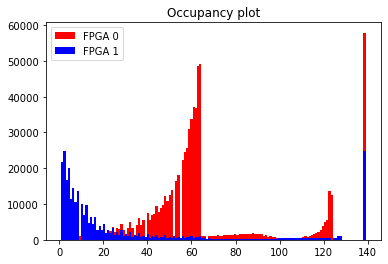

In [9]:
#7. Answer
ch_1 = data_df[data_df['FPGA']==1]
ch_0 = data_df[data_df['FPGA']==0]
bn =data_df['TDC_CHANNEL'].max()

plt.hist(ch_0['TDC_CHANNEL'],color='r', bins = bn, label ='FPGA 0')
plt.hist(ch_1['TDC_CHANNEL'],color ='b', bins = bn, label ='FPGA 1')
plt.legend()
plt.title('Occupancy plot')
plt.show()

In [10]:
#8. Answer
noisy_0 = ch_0[['TDC_CHANNEL','TIME']].groupby('TDC_CHANNEL').count() #Pick the largest times for channel x
noisy_0 =noisy_0.nlargest(3,'TIME')                                   #Pick the largest 3
print('The three noisiest channels for FPGA_0 are')
noisy_0

The three noisiest channels for FPGA_0 are


,TIME
TDC_CHANNEL,
139,57878
64,49109
63,48604


In [11]:
#8. Answer
noisy_1 = ch_1[['TDC_CHANNEL','TIME']].groupby('TDC_CHANNEL').count()
noisy_1 =noisy_1.nlargest(3,'TIME')
print('The three noisiest channels for FPGA_1 are')
noisy_1

The three noisiest channels for FPGA_1 are


,TIME
TDC_CHANNEL,
2,24871
139,24799
1,21622


In [12]:
#9. Answer
unique_orbits = data_df.groupby('ORBIT_CNT').count()
print('The number of unique orbits is',len(unique_orbits))

tdc_139 = data_df[data_df["TDC_CHANNEL"]==139]["ORBIT_CNT"].nunique()
print('The number of unique orbits with at least one measurement from TDC_CHANNEL=139 is',tdc_139)


The number of unique orbits is 8841
The number of unique orbits with at least one measurement from TDC_CHANNEL=139 is 8816
